In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize((0.5), (0.5))
    ])



mnist_data = MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=256,
                                          shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.61MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.2MB/s]


In [ ]:
dataiter = iter(data_loader)
images, labels =next( dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
class Simple_AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,8),
        nn.ReLU(),
        nn.Linear(8,2)
    )
    self.decoder=nn.Sequential(
        nn.Linear(2,8),
        nn.ReLU(),
        nn.Linear(8,32),
        nn.ReLU(),
        nn.Linear(32,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid()  #To get output b/w 0 and 1
    )

  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

In [ ]:
class CNN_AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(
        nn.Conv2d(1,16,3,stride=2,padding=1),#(N,14,14)
        nn.ReLU(),
        nn.Conv2d(16,32,3,2,1),#(N,7,7)
        nn.ReLU(),
        nn.Conv2d(32,64,7),
        nn.ReLU(),
    )
    self.decoder=nn.Sequential(
        nn.ConvTranspose2d(64,32,7),
        nn.ReLU(),
        nn.ConvTranspose2d(32,16,3,2,1,output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16,1,3,2,1,output_padding=1),
        nn.Sigmoid()  #To get output b/w 0 and 1
    )

  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [ ]:
model=CNN_AutoEncoder().to(device)
crit=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=1e-3)

In [ ]:
num_epochs=10
outputs=[]
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img=img.to(device)
        # img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        recon = model(img)
        loss = crit(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0598
Epoch:2, Loss:0.0192
Epoch:3, Loss:0.0126
Epoch:4, Loss:0.0108
Epoch:5, Loss:0.0091
Epoch:6, Loss:0.0081
Epoch:7, Loss:0.0076
Epoch:8, Loss:0.0071
Epoch:9, Loss:0.0067
Epoch:10, Loss:0.0063


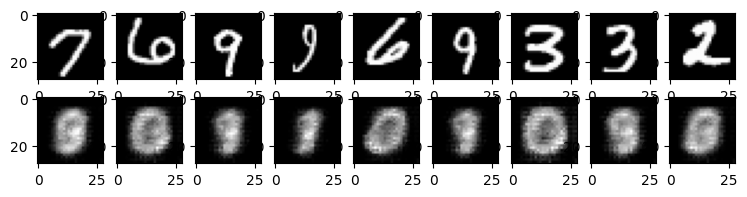

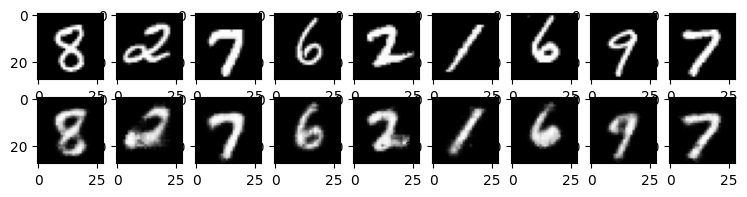

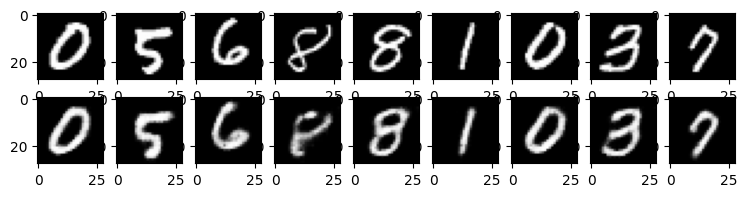

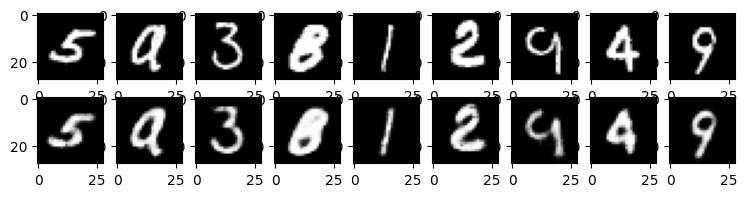

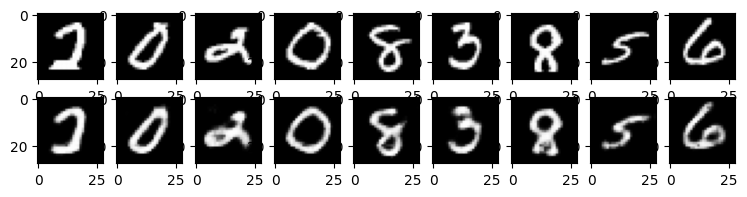

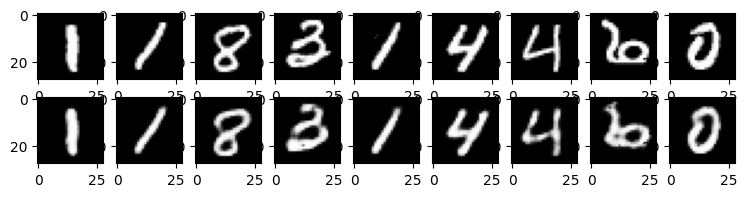

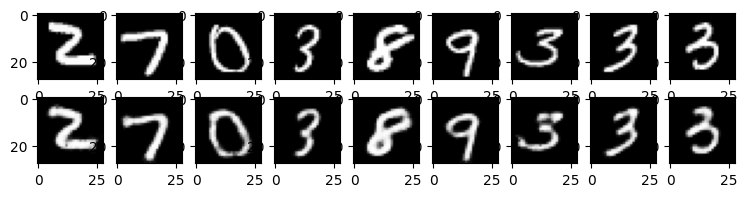

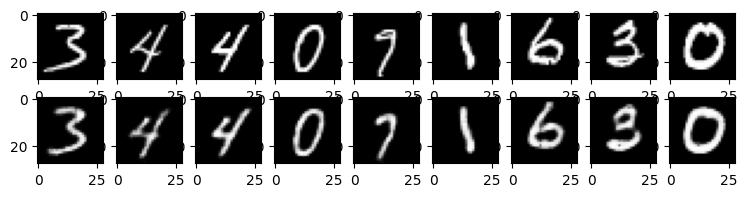

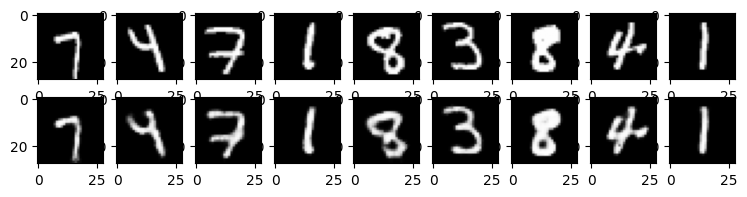

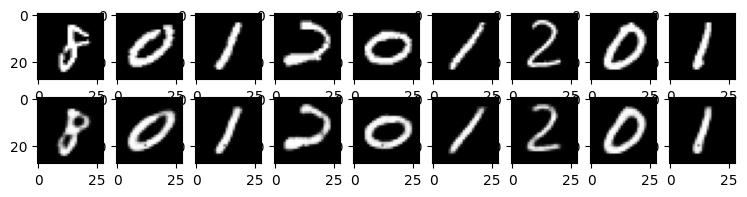

In [ ]:
for k in range(0, num_epochs):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].cpu().detach().numpy()
    recon = outputs[k][2].cpu().detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

In [ ]:
img=torch.randn(1,1,28,28).to(device)

In [ ]:
enc=model.encoder(img)

In [ ]:
enc.shape

torch.Size([1, 64, 1, 1])

In [ ]:
dec=model.decoder(enc)

In [ ]:
dec.shape

torch.Size([1, 1, 28, 28])

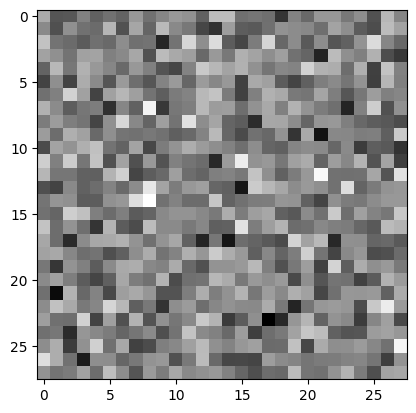

In [ ]:
plt.imshow(img.cpu().detach().numpy()[0][0], cmap='gray')

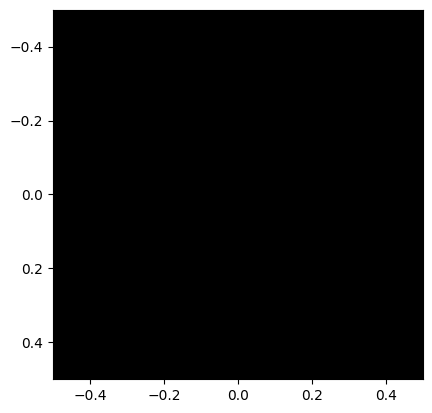

In [ ]:
plt.imshow(enc.cpu().detach().numpy()[0][0], cmap='gray')

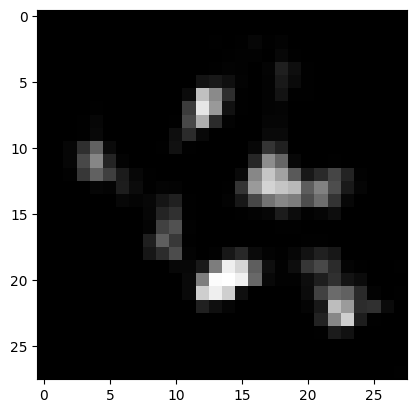

In [ ]:
plt.imshow(dec.cpu().detach().numpy()[0][0], cmap='gray')